# Stack Overflow

## Introduction 

In the second part of this assignment, we will create and analyze time series of creation dates of Stack Overflow questions. This assignment is to be completed **INDIVIDUALLY** and it is due on **October 7 at 7pm**.

Let's create some time series from the data. You may choose to analyze either users or tags. To analyze users, take the top 100 users with the most question posts. For each user, your time series will be the number of questions posted by that user at some frequency. To analyze tags, take the top 100 most popular question tags. For each tag, your time series will be the number of questions with that tag at some frequency. You may choose to sample your data each week, each month, on a certain day of the week or at certain hours in a day depending on what trend you are hoping to find in the data. For example, if you choose to analyze tags and sample during different hours of the day, your hypothesis could be that languages (i.e. Javascript) that are used more in industry will have more questions posted during work hours, whereas languages (i.e. Python) that are taught in academia will have more questions posted after midnight when students are scrambling to finish their homework.

Compare the time series using one of the methods discussed in class. In a few paragraphs, write down what you were hoping to find in the data, what timeseries you created, what method you chose and why. **(30 pts)**

You may find the [pandas.DataFrame.resample](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.resample.html) module helpful.

ANALYSIS

I chose to analyze the tags and to group them by month. 
My hypothesis stems from my basic understanding of the popularity of tags among users on Stack Overflow. Since we are only looking at the top 100 tags, I do not think that we will be able to see a great fluctuation among the popularity of a tag from month to moth. Some possible causes for an increase in use of a tag, could be that it is recently created or it is a new fad, but with tags such as Java, and JavaScript I wouldn’t think that their popularity would change much in a year between months, so I think when we look at their frequency their values will stay pretty constant. I also think that we are going to see that technologies that are front end and common industry will appear in our top 100 list.

Hypothesis:
I think that tags for front-end technologies like JavaScript and AngularJS will have a similar frequency because they tend to be used together for webdevelopment while Javascript and Visual Studio will have dissimilar frequencies becasue they aren't used together and the frequncy of one technology doesn't depend on the other.

Conclusion:
In the time series that I created I was hoping to see that similar front end technologies would have the same frequency. It turns out that most of the technologies have a similar frequency, although the values by how many  posts there are changes often. Most tags tend to spike aroumd August.


In [7]:
import pandas as pd
import numpy as np
import xml.etree.cElementTree as ElementTree
from pandas import Series, DataFrame
import csv
import re
from scipy.spatial.distance import cdist
import scipy.spatial.distance
import matplotlib.pyplot as plt
%matplotlib inline

print('start')
#IMPORTANT
#this must be run even though it takes over 5 minutes because github would not let me submit 
#my compressed file because it was still too big

with open('question_dataframe.csv', 'w') as csvfile:
    columnNames = ['Id', 'CreationMonth', 'OwnerUserId', 'Tags', 'NumTags']
    writeFile = csv.DictWriter(csvfile, fieldnames = columnNames)
    writeFile.writeheader()
    for posts, row in ElementTree.iterparse('stackoverflow-posts-2015.xml'):
        if (('Id' in row.attrib) and ('CreationDate' in row.attrib) and ('Tags' in row.attrib) and('OwnerUserId' in row.attrib)): 
            if (row.attrib.get('PostTypeId') == '1'):
                tag = re.split('<(.+?)>',row.attrib.get('Tags'))[1::2]
                for t in tag:
                    date = re.split('-(\d\d)-', row.attrib.get('CreationDate'))
                    writeFile.writerow({'Id': row.attrib.get('Id'),
                        'CreationMonth': date[1],
                        'OwnerUserId': row.attrib.get('OwnerUserId'),
                        'Tags': t,
                        'NumTags': 1})
        row.clear()
            
df  = pd.read_csv('question_dataframe.csv')
sumedSortedTags = ((df.groupby(['Tags'])).sum().sort_values(by='NumTags', ascending=False))[0:100].reset_index()
tagList = sumedSortedTags['Tags'].tolist()

df = (df.groupby(['Tags','CreationMonth'])[['NumTags']].sum()).reset_index()
tagsMonthCount = (df[df.Tags.isin(tagList)])
listOfTagsByMonth = []
tag = []
# for i in range(12):
tagNameOrder = []
for index, row in tagsMonthCount.iterrows():
    tag.append(row['NumTags']) #add the number of tags to an array corresponding to its month 0=Jan
    if (row['CreationMonth'] == 12):
        listOfTagsByMonth.append(tag)
        tag = []
        tagNameOrder.append(row['Tags'])

dates = pd.date_range('2015-01', '2016-01', freq='M')
# print (dates)
# for x in listOfTagsByMonth:
timeFrame = pd.DataFrame(data=listOfTagsByMonth, columns=dates)

# print (listOfTagsByMonth)    

timeFrame = (timeFrame.transpose())

print ("here")
with open('euclid_dataframe.csv', 'w') as csvfile:
    columnNames = ['Dist', 'Tag1','Tag2']
    writeFile = csv.DictWriter(csvfile, fieldnames = columnNames)
    writeFile.writeheader()
    for i in range(100):
        x = timeFrame.as_matrix(columns=[timeFrame.columns[i]])
        for j in range(i+1,100):
            y = timeFrame.as_matrix(columns=[timeFrame.columns[j]])
            dist = np.linalg.norm(x-y)
            writeFile.writerow({'Dist': dist, 'Tag1': i, 'Tag2': j}) 
    
distFrame = pd.read_csv('euclid_dataframe.csv')
# print (distFrame.sort_values('Dist'))
# print (tagNameOrder[53])
# print (timeFrame.as_matrix(columns=[timeFrame.columns[53]]))
# print (tagNameOrder[89])
# print (timeFrame.as_matrix(columns=[timeFrame.columns[89]]))
# print (tagNameOrder[30])
# print (timeFrame.as_matrix(columns=[timeFrame.columns[30]]))
# print (tagNameOrder[44])
# print (timeFrame.as_matrix(columns=[timeFrame.columns[44]]))                                    

print ('stop')


start
here
stop


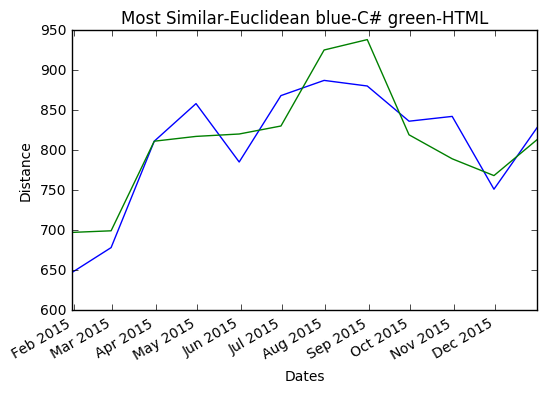

In [32]:
fig, ax = plt.subplots()
ax.plot_date(dates, timeFrame[53], marker='', linestyle='-') #blue
ax.plot_date(dates, timeFrame[89], marker='', linestyle='-') #green 
ax.set_xlabel('Dates')
ax.set_ylabel('Distance')
ax.set_title('Most Similar-Euclidean blue-C# green-HTML')
fig.autofmt_xdate()
plt.show()

The 2 most similar tags have a euclidean distance of 125.343528 and are the tagsmeteor and uitableview.

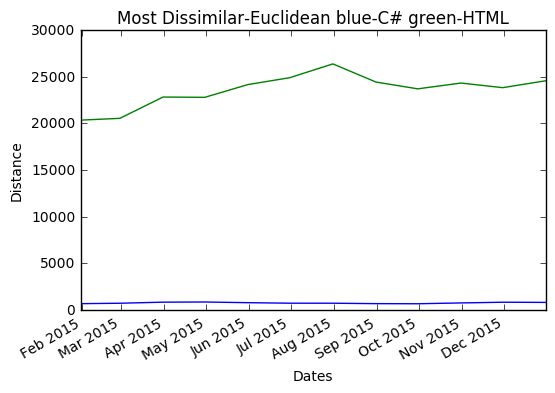

In [33]:
fig, ax = plt.subplots()
ax.plot_date(dates, timeFrame[30], marker='', linestyle='-')
ax.plot_date(dates, timeFrame[44], marker='', linestyle='-')
ax.set_xlabel('Dates')
ax.set_ylabel('Distance')
ax.set_title('Most Dissimilar-Euclidean blue-C# green-HTML')
fig.autofmt_xdate()
plt.show()

The 2 most dissimilar tagss have a euclidean distance of 79194.369882 are file and javascript.


Choose a different distance/similarity metric and repeat the same time series analysis. Compare the two different metrics you used. **(10 pts)**

In [24]:
with open('cosine_dataframe.csv', 'w') as csvfile:
    columnNames = ['Dist', 'Tag1','Tag2']
    writeFile = csv.DictWriter(csvfile, fieldnames = columnNames)
    writeFile.writeheader()
    for i in range(100):
        x = timeFrame.as_matrix(columns=[timeFrame.columns[i]])
        for j in range(i+1,100):
            y = timeFrame.as_matrix(columns=[timeFrame.columns[j]])
            dist = scipy.spatial.distance.cosine(u=x,v=y)
            writeFile.writerow({'Dist': dist, 'Tag1': i, 'Tag2': j}) 
    
myDistances = pd.read_csv('cosine_dataframe.csv')

# print (tagNameOrder[16])
# print (timeFrame.as_matrix(columns=[timeFrame.columns[16]]))
# # print (tagNameOrder[38])
# print (timeFrame.as_matrix(columns=[timeFrame.columns[38]]))
# # print (tagNameOrder[51])
# print (timeFrame.as_matrix(columns=[timeFrame.columns[51]]))
# # print (tagNameOrder[92])
print (timeFrame.as_matrix(columns=[timeFrame.columns[92]]))     

# C# html
# matlab visual studio

# print(myDistances.sort_values(by='Dist'))

[[ 660]
 [ 650]
 [ 850]
 [ 803]
 [ 852]
 [ 852]
 [1018]
 [1112]
 [1175]
 [1214]
 [1106]
 [1246]]


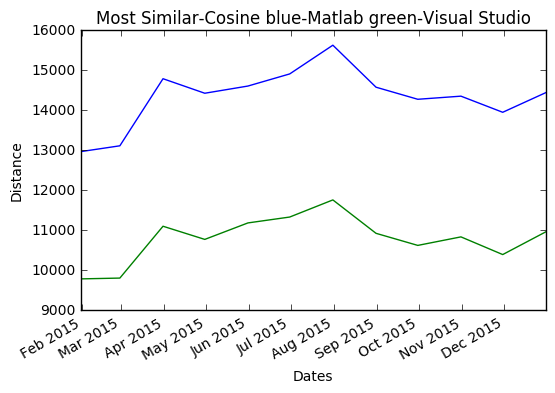

In [37]:
fig, ax = plt.subplots()
ax.plot_date(dates, timeFrame[16], marker='', linestyle='-')
ax.plot_date(dates, timeFrame[38], marker='', linestyle='-')
ax.set_xlabel('Dates')
ax.set_ylabel('Distance')
ax.set_title('Most Similar-Cosine blue-Matlab green-Visual Studio')
fig.autofmt_xdate()
plt.show()

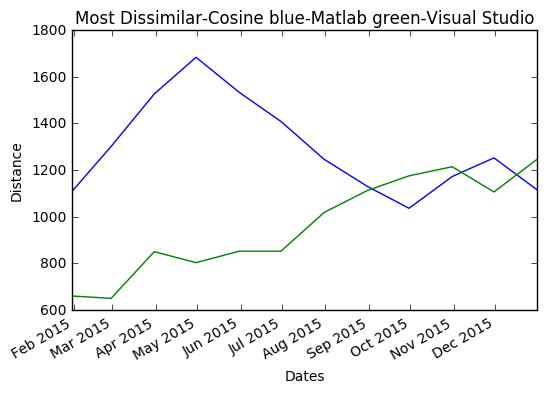

In [36]:
fig, ax = plt.subplots()
ax.plot_date(dates, timeFrame[51], marker='', linestyle='-')
ax.plot_date(dates, timeFrame[92], marker='', linestyle='-')
ax.set_xlabel('Dates')
ax.set_ylabel('Distance')
ax.set_title('Most Dissimilar-Cosine blue-Matlab green-Visual Studio')
fig.autofmt_xdate()
plt.show()

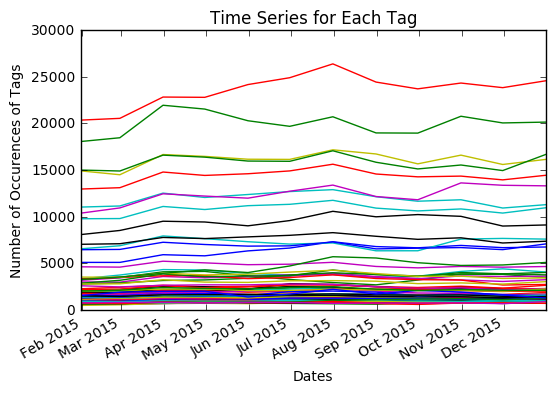

In [17]:
fig, ax = plt.subplots()
ax.plot_date(dates, timeFrame, marker='', linestyle='-')
fig.autofmt_xdate()
ax.set_xlabel('Dates')
ax.set_ylabel('Number of Occurences of Tags')
ax.set_title('Time Series for Each Tag')
plt.show()

In [44]:
print (tagNameOrder)


['.htaccess', '.net', 'ajax', 'algorithm', 'amazon-web-services', 'android', 'android-studio', 'angularjs', 'apache', 'api', 'arrays', 'asp.net', 'asp.net-mvc', 'azure', 'bash', 'c', 'c#', 'c++', 'codeigniter', 'cordova', 'css', 'css3', 'csv', 'database', 'django', 'eclipse', 'entity-framework', 'excel', 'excel-vba', 'facebook', 'file', 'forms', 'function', 'git', 'google-chrome', 'google-maps', 'hadoop', 'hibernate', 'html', 'html5', 'image', 'ios', 'iphone', 'java', 'javascript', 'jquery', 'json', 'laravel', 'linux', 'list', 'loops', 'matlab', 'maven', 'meteor', 'mongodb', 'multithreading', 'mysql', 'node.js', 'objective-c', 'oracle', 'osx', 'pandas', 'parse.com', 'performance', 'php', 'postgresql', 'powershell', 'python', 'python-2.7', 'python-3.x', 'qt', 'r', 'regex', 'rest', 'ruby', 'ruby-on-rails', 'ruby-on-rails-4', 'scala', 'shell', 'spring', 'spring-mvc', 'sql', 'sql-server', 'sqlite', 'string', 'swift', 'swing', 'symfony2', 'twitter-bootstrap', 'uitableview', 'vb.net', 'vba',